## Handwritten Number Recognition with TFLearn and MNIST

En este notebook, construiremos una red neuronal que reconozca los números manuscritos 0-9.

Este tipo de red neuronal se usa en una variedad de aplicaciones del mundo real que incluyen: reconocer números de teléfono, clasificar el correo postal por dirección, entre otros. Para construir la red, usaremos el conjunto de datos MNIST, que consiste en imágenes de números escritos a mano y sus etiquetas correspondientes a los números 0-9.

Usaremos TFLearn, una biblioteca de alto nivel construida sobre TensorFlow para construir la red neuronal. Comenzaremos importando todos los módulos que necesitaremos, luego cargaremos los datos y finalmente construiremos la red.

Debe tener instlado en el ambiente de trabajo, las librerias necesariias tales como TFLearn, h5py, scipy etc.

In [2]:
# Import Numpy, TensorFlow, TFLearn, and MNIST data
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

# Training and test data

El conjunto de datos MNIST ya contiene datos de entrenamiento y de prueba. Hay 55,000 datos de entrenamiento y 10,000 datos de prueba.

Cada dato MNIST tiene:

- una imagen de un dígito manuscrito y
- una etiqueta correspondiente (un número 0-9 que identifica la imagen)

Llamaremos a las imágenes, que serán la entrada a nuestra red neuronal, X y sus correspondientes etiquetas Y.

Vamos a querer que nuestras etiquetas sean vectores one-hot-encode, que son vectores que contienen mayormente 0 y un 1. Es más fácil ver esto en un ejemplo: Como one-hot-encode, el número 0 se representa como [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] y el 4 se representa como [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].


## Aplanamiento de datos (Flattened Data)

Para este ejemplo, usaremos datos aplanados o una representación de imágenes MNIST en una dimensión en lugar de dos. Por lo tanto, cada imagen de número manuscrita, que es de 28x28 píxeles, se representará como una matriz unidimensional de valores de 784 píxeles.

Al aplanar los datos, se desecha la información sobre la estructura 2D de la imagen, pero simplifica nuestros datos para que los correspondientes a entrenamiento puedan estar contenidos en una matriz cuya forma es [55000, 784]; la primera dimensión es el número de imágenes de entrenamiento y la segunda dimensión es el número de píxeles en cada imagen. Este es el tipo de datos que es más fácil de analizar utilizando una red neuronal simple.


In [3]:
# Retrieve the training and test data
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


## Visualize the training data

A continuación se proporciona una función que ayudará a visualizar los datos del MNIST. Al pasar el índice de un ejemplo de entrenamiento, la función show_digit mostrará esa imagen de entrenamiento junto con su etiqueta correspondiente en el título.


[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


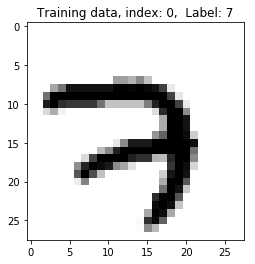

In [4]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Function for displaying a training image by it's index in the MNIST set
def show_digit(index):
    label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = trainX[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
print(trainY[0])
show_digit(0)

## Building the network

TFLearn permite construir la red neuronal definiendo las capas.

Para este ejemplo, se debe definir:

   - La capa de entrada, que le dice a la red el número de entradas que debe esperar para cada parte de los datos de MNIST.
   - Las capas ocultas, que reconocen patrones en los datos y conectan la entrada a la capa de salida, y
   - La capa de salida, que define cómo la red aprende y genera una etiqueta para una imagen dada.

Vamos para empezar la capa de entrada; para definir la capa de entrada, definirá el tipo de datos que la red espera. Por ejemplo,

    net = tflearn.input_data([None, 100])

Crearía una red con 100 entradas. El número de entradas a su red debe coincidir con el tamaño de los datos. Para este ejemplo, estamos utilizando vectores largos de 784 elementos para codificar nuestros datos de entrada, por lo que necesitamos 784 unidades de entrada.

## Adding layers

Para agregar nuevas capas ocultas, se usa:

    net = tflearn.fully_connected (net, n_units, activación = 'ReLU')

Esto agrega una capa totalmente conectada, donde cada unidad (o nodo) en la capa anterior está conectada a cada unidad en esta capa. El primer argumento net es la red que creó en la llamada tflearn.input_data, que designa la entrada a la capa oculta. Puede establecer el número de unidades en la capa con n_units y configurar la función de activación con la palabra clave de activación. Puede seguir agregando capas a su red llamando repetidamente a tflearn.fully_connected (net, n_units).

Luego, para configurar el entrenamiento de la red, se usa:

    net = tflearn.regression (net, optimizer = 'sgd', learning_rate = 0.1, loss = 'categorical_crossentropy')

Las palabras clave:

- *optimizer* establece el método de entrenamiento, por ejemplo el descenso de gradiente estocástico (SGD)
- *learning_rate* es la tasa de aprendizaje.
- *loss* determina cómo se calcula el error en la red. En este ejemplo, con 'categorical_crossentropy'.

Finalmente, se coloca todo junto para crear el modelo con tflearn.DNN (net)

La función build_model( ), armará la red utilizando TFLearn. Se puede elegir cuántas capas utilizar, cuántas unidades ocultas, etc.

La capa de salida final debe tener 10 nodos de salida (uno para cada dígito 0-9). e recomienda usar una capa de activación de softmax como la capa de salida final.


In [5]:
# Define the neural network
def build_model():
    # This resets all parameters and variables, leave this here
    tf.reset_default_graph()
    
    # Include the input layer, hidden layer(s), and set how you want to train the model
    #Inputs
    net = tflearn.input_data([None, 784])
    
    #Hidden layers
    net = tflearn.fully_connected(net, 100, activation = 'ReLU')
    
    #Output
    net = tflearn.fully_connected(net, 10, activation = 'softmax')
    
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.1, loss='categorical_crossentropy')
    
    # This model assumes that your network is named "net"    
    model = tflearn.DNN(net)
    return model

In [6]:
# Build the model
model = build_model()

## Training the network

Ahora que hemos construido la red y guardado como modelo, podemos ajustarla a los datos. Aquí usamos el método model.fit. Se pasan los datos de entrada entrenamiento trainX y los datos de salida entrenamiento trainY. 

A continuación, se establece validation_set = 0.1, que reserva el 10% del conjunto de datos como el conjunto de validación. También puede establecer el tamaño del batch y el número de epochz con las palabras clave batch_size y n_epoch, respectivamente.

Muy pocos epochs no entrenan eficazmente su red, y demasiadas tardan mucho tiempo en ejecutarse. ¡Elegir sabiamente!


In [7]:
# Training
model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=20)

Training Step: 9899  | total loss: 0.39582 | time: 1.674s
| SGD | epoch: 020 | loss: 0.39582 - acc: 0.9610 -- iter: 49400/49500
Training Step: 9900  | total loss: 0.36857 | time: 2.690s
| SGD | epoch: 020 | loss: 0.36857 - acc: 0.9609 | val_loss: 0.10394 - val_acc: 0.9711 -- iter: 49500/49500
--


## Testing

Una vez que haya alcanzado un buen rendimiento en el punto anterior, puede ejecutar la red con el conjunto de datos de prueba para medir su rendimiento. Recuerde, solo haga esto después de haber realizado el entrenamiento y esté satisfecho con los resultados.

Un buen resultado será más del 95% de precisión. ¡Se sabe que algunos modelos simples que tienen una precisión de hasta el 99.7%!

Se recomienda "jugar" con los hyper-parámetros.


In [8]:
# Compare the labels that our model predicts with the actual labels

# Find the indices of the most confident prediction for each item. That tells us the predicted digit for that sample.
predictions = np.array(model.predict(testX)).argmax(axis=1)

# Calculate the accuracy, which is the percentage of times the predicated labels matched the actual labels
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Print out the result
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9748
